## ODI WORLD CUP ANALYSIS

In [1]:
#importing necessary librararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the datasets
batting_df = pd.read_csv('batting_summary.csv')
bowling_df = pd.read_csv('bowling_summary.csv')

# Displaying the first few rows to understand the structure
batting_df.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700


In [2]:
bowling_df.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [3]:
batting_df['Match_no'] = batting_df['Match_no'].astype(str)
bowling_df['Match_no'] = bowling_df['Match_no'].astype(str)

# Merging datasets on Match_no
merged_df = pd.merge(batting_df, bowling_df, on='Match_no', how='outer', suffixes=('_bat', '_bowl'))

# Saving the merged dataset
merged_df.to_csv('merged_odi_stats.csv', index=False)

In [4]:
# Loading the merged dataset
merged_df = pd.read_csv('merged_odi_stats.csv')

# Displaying the first few rows to understand the structure
merged_df.head()

,Match_no,Match_Between_bat,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs_bat,Balls,4s,6s,Strike_Rate,Match_Between_bowl,Bowling_Team,Bowler_Name,Overs,Maidens,Runs_bowl,Wickets,Economy
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


## Data Cleaning

In [5]:
# Checking for missing values
print(merged_df.isnull().sum())

Match_no               0
Match_Between_bat      0
Team_Innings           0
Batsman_Name           0
Batting_Position       0
Dismissal             23
Runs_bat               0
Balls                  0
4s                     0
6s                     0
Strike_Rate            0
Match_Between_bowl     0
Bowling_Team           0
Bowler_Name            0
Overs                  0
Maidens                0
Runs_bowl              0
Wickets                0
Economy                0
dtype: int64


In [6]:
numeric_columns = ['Runs_bat', 'Balls', '4s', '6s', 'Strike_Rate', 'Overs', 'Maidens', 'Runs_bowl', 'Wickets', 'Economy']
merged_df[numeric_columns] = merged_df[numeric_columns].fillna(0)
categorical_columns = ['Match_Between_bat', 'Team_Innings', 'Batsman_Name', 'Dismissal', 'Match_Between_bowl', 'Bowling_Team', 'Bowler_Name']
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Unknown')

## Data Transformation

In [7]:
# Converting the data types
merged_df['Match_no'] = merged_df['Match_no'].astype(str)
merged_df[numeric_columns] = merged_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Removing all duplicates
merged_df.drop_duplicates(inplace=True)

# Verifying the cleaning steps
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10948 entries, 0 to 10947
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Match_no            10948 non-null  object 
 1   Match_Between_bat   10948 non-null  object 
 2   Team_Innings        10948 non-null  object 
 3   Batsman_Name        10948 non-null  object 
 4   Batting_Position    10948 non-null  int64  
 5   Dismissal           10948 non-null  object 
 6   Runs_bat            10948 non-null  int64  
 7   Balls               10948 non-null  int64  
 8   4s                  10948 non-null  int64  
 9   6s                  10948 non-null  int64  
 10  Strike_Rate         10878 non-null  float64
 11  Match_Between_bowl  10948 non-null  object 
 12  Bowling_Team        10948 non-null  object 
 13  Bowler_Name         10948 non-null  object 
 14  Overs               10948 non-null  float64
 15  Maidens             10948 non-null  int64  
 16  Runs

,Match_no,Match_Between_bat,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs_bat,Balls,4s,6s,Strike_Rate,Match_Between_bowl,Bowling_Team,Bowler_Name,Overs,Maidens,Runs_bowl,Wickets,Economy
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [8]:
# Creating an all-rounder score
merged_df['All_Rounder_Score'] = merged_df['Runs_bat'] + merged_df['Wickets'] * 10

# Calculating batting average (excluding 'Not Out' dismissals)
merged_df['Batting_Average'] = merged_df.apply(
    lambda row: row['Runs_bat'] / (1 if row['Dismissal'] != 'Not Out' else 0.5), axis=1)

# Ensuring strike rate is calculated correctly
merged_df['Strike_Rate'] = merged_df.apply(
    lambda row: (row['Runs_bat'] / row['Balls']) * 100 if row['Balls'] > 0 else 0, axis=1)

In [9]:
merged_df.head()

,Match_no,Match_Between_bat,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs_bat,Balls,4s,6s,...,Match_Between_bowl,Bowling_Team,Bowler_Name,Overs,Maidens,Runs_bowl,Wickets,Economy,All_Rounder_Score,Batting_Average
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8,43,33.0
1,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8,63,33.0
2,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7,53,33.0
3,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0,33,33.0
4,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,...,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6,43,33.0


In [10]:
df= pd.read_csv('merged_odi_stats.csv')

In [11]:
df.head()

,Match_no,Match_Between_bat,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs_bat,Balls,4s,6s,Strike_Rate,Match_Between_bowl,Bowling_Team,Bowler_Name,Overs,Maidens,Runs_bowl,Wickets,Economy
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


## Plot Individual Performance

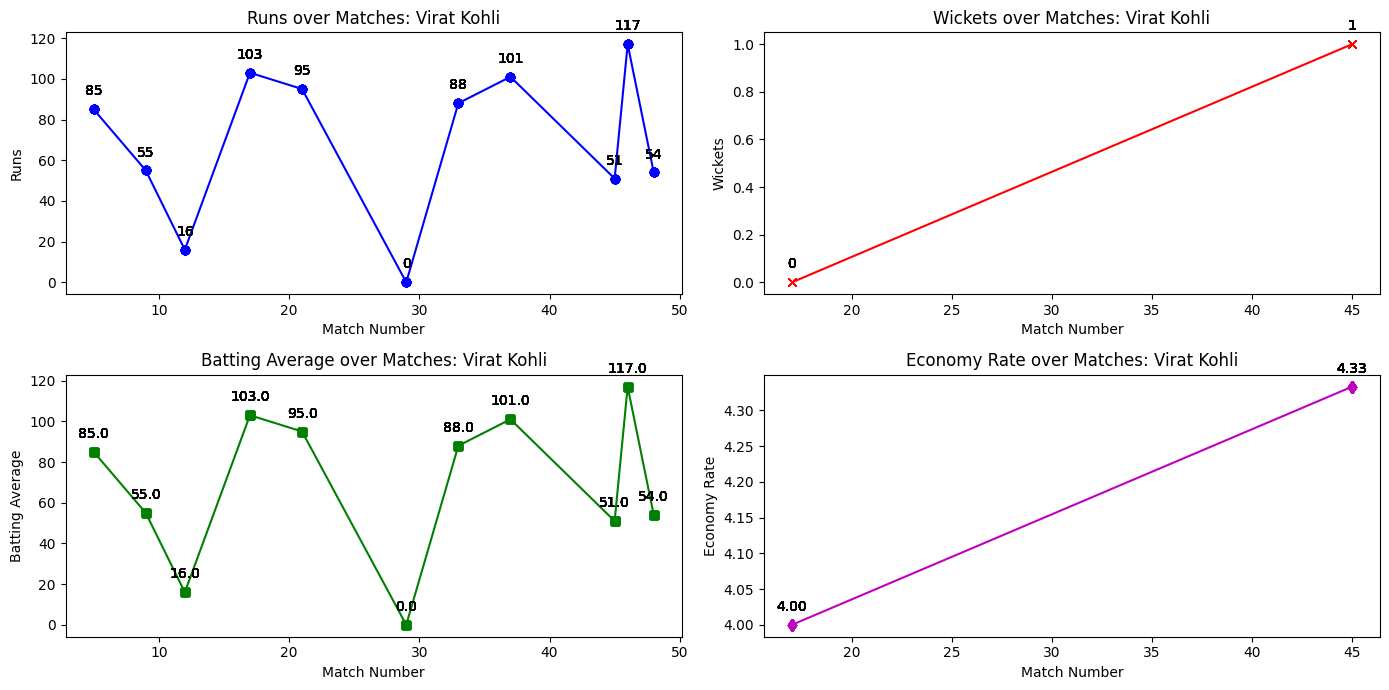

,Match_no,Match_Between_bat,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs_bat,Balls,4s,6s,Strike_Rate,Match_Between_bowl,Bowling_Team,Bowler_Name,Overs,Maidens,Runs_bowl,Wickets,Economy,Role
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.80,All-Rounder
1,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.80,All-Rounder
2,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.70,All-Rounder
3,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.00,Batsman
4,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.60,All-Rounder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,Pakistan vs Netherlands,Pakistan,Shaheen Afridi,10,not out,13,12,2,0,108.300,Pakistan vs Netherlands,Netherlands,Logan van Beek,6.0,0,30,1,5.00,Bowler
296,2,Pakistan vs Netherlands,Pakistan,Shaheen Afridi,10,not out,13,12,2,0,108.300,Pakistan vs Netherlands,Netherlands,Colin Ackermann,8.0,1,39,2,4.88,Bowler
297,2,Pakistan vs Netherlands,Pakistan,Shaheen Afridi,10,not out,13,12,2,0,108.300,Pakistan vs Netherlands,Netherlands,Paul van Meekeren,6.0,0,40,1,6.67,Bowler
298,2,Pakistan vs Netherlands,Pakistan,Shaheen Afridi,10,not out,13,12,2,0,108.300,Pakistan vs Netherlands,Netherlands,Bas de Leede,9.0,0,62,4,6.89,Bowler


In [12]:
# Define criteria thresholds (these are arbitrary and can be adjusted)
BATSMAN_THRESHOLD = 20
BOWLER_THRESHOLD = 1

# Function to categorize players
def categorize_player(row):
    if row['Runs_bat'] >= BATSMAN_THRESHOLD and row['Wickets'] < BOWLER_THRESHOLD:
        return 'Batsman'
    elif row['Runs_bat'] < BATSMAN_THRESHOLD and row['Wickets'] >= BOWLER_THRESHOLD:
        return 'Bowler'
    elif row['Runs_bat'] >= BATSMAN_THRESHOLD and row['Wickets'] >= BOWLER_THRESHOLD:
        return 'All-Rounder'
    else:
        return 'All-Rounder'

# Apply the categorization function
df['Role'] = df.apply(categorize_player, axis=1)

# Function to plot individual performance
def plot_individual_performance(player_name):
    player_data_bat = df[df['Batsman_Name'] == player_name].copy()
    player_data_bowl = df[df['Bowler_Name'] == player_name].copy()
    
    if player_data_bat.empty and player_data_bowl.empty:
        print(f"No data available for player: {player_name}")
        return
    
    plt.figure(figsize=(14, 7))
    
    # Subplot 1: Runs over matches
    if not player_data_bat.empty:
        plt.subplot(2, 2, 1)
        plt.plot(player_data_bat['Match_no'], player_data_bat['Runs_bat'], marker='o', linestyle='-', color='b')
        plt.title(f'Runs over Matches: {player_name}')
        plt.xlabel('Match Number')
        plt.ylabel('Runs')
        for i, row in player_data_bat.iterrows():
            plt.annotate(row['Runs_bat'], (row['Match_no'], row['Runs_bat']), textcoords="offset points", xytext=(0, 10), ha='center')
    
    # Subplot 2: Wickets over matches
    if not player_data_bowl.empty:
        plt.subplot(2, 2, 2)
        plt.plot(player_data_bowl['Match_no'], player_data_bowl['Wickets'], marker='x', linestyle='-', color='r')
        plt.title(f'Wickets over Matches: {player_name}')
        plt.xlabel('Match Number')
        plt.ylabel('Wickets')
        for i, row in player_data_bowl.iterrows():
            plt.annotate(row['Wickets'], (row['Match_no'], row['Wickets']), textcoords="offset points", xytext=(0, 10), ha='center')
    
    # Subplot 3: Batting Average over matches
    if not player_data_bat.empty:
        player_data_bat['Batting_Average'] = player_data_bat.apply(
            lambda row: row['Runs_bat'] / (1 if row['Dismissal'] != 'Not Out' else 0.5), axis=1)
        plt.subplot(2, 2, 3)
        plt.plot(player_data_bat['Match_no'], player_data_bat['Batting_Average'], marker='s', linestyle='-', color='g')
        plt.title(f'Batting Average over Matches: {player_name}')
        plt.xlabel('Match Number')
        plt.ylabel('Batting Average')
        for i, row in player_data_bat.iterrows():
            plt.annotate(f"{row['Batting_Average']:.1f}", (row['Match_no'], row['Batting_Average']), textcoords="offset points", xytext=(0, 10), ha='center')
    
    # Subplot 4: Economy Rate over matches
    if not player_data_bowl.empty:
        plt.subplot(2, 2, 4)
        plt.plot(player_data_bowl['Match_no'], player_data_bowl['Economy'], marker='d', linestyle='-', color='m')
        plt.title(f'Economy Rate over Matches: {player_name}')
        plt.xlabel('Match Number')
        plt.ylabel('Economy Rate')
        for i, row in player_data_bowl.iterrows():
            plt.annotate(f"{row['Economy']:.2f}", (row['Match_no'], row['Economy']), textcoords="offset points", xytext=(0, 10), ha='center')
    
    plt.tight_layout()
    plt.show()

# plot performance for a specific player
plot_individual_performance('Virat Kohli')

# Display the first few rows to see the Role column
df.head(300)


In [13]:
# Filtering batsmen, bowlers, and all-rounders based on their roles
batsmen = df[df['Role'] == 'Batsman']
bowlers = df[df['Role'] == 'Bowler']
all_rounders = df[df['Role'] == 'All-Rounder']

# Selecting the top 5 performers for batsmen, bowlers, and all-rounders
top_batsmen = batsmen.groupby('Batsman_Name')['Runs_bat'].sum().nlargest(5).index
top_bowlers = bowlers.groupby('Bowler_Name')['Wickets'].sum().nlargest(5).index
top_all_rounders = all_rounders.groupby('Batsman_Name')['Runs_bat'].sum().nlargest(4).index

# Combining the selected players into a single team
selected_players = set(top_batsmen) | set(top_bowlers) | set(top_all_rounders)

# Displaying the selected team
print("Selected Team:")
for player in selected_players:
    print("-", player)


Selected Team:
- Mohammed Shami
- David Warner
- Mitchell Starc
- Shreyas Iyer
- Rohit Sharma
- Adam Zampa
- Rachin Ravindra
- Gerald Coetzee
- Pat Cummins
- Virat Kohli
- Daryl Mitchell
- Quinton de Kock
